### Make and create a sunpy map
---

We load, crop, and plot an EUI/FSI image of the Sun. Note that the `plt.show()` command is not necessary in a Jupyter notebook, but you would need it in a regular Python script or terminal.


In [1]:
import numpy as np  
import matplotlib.pyplot as plt # for plotting
import sunpy 
import sunpy.map # needed to create a sunpy map, import separately from sunpy
import astropy
import astropy.units as u # for handling units
from astropy.visualization import ImageNormalize, LogStretch # for image normalization and stretching
from glob import glob # for file search

In [2]:
# search for files, similar to IDL FILE_SEARCH
files = glob("../data/solo_L2_eui-fsi174-*.fits")
print(files)

['../data/solo_L2_eui-fsi174-image_20240912T000045277_V01.fits']


In [3]:
# load the map into a sunpy map object

smap = sunpy.map.Map(files[0])

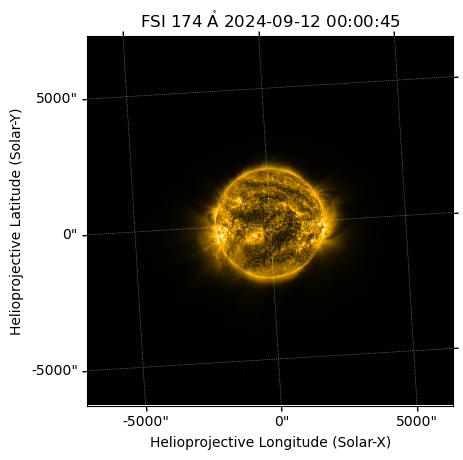

In [4]:
# take a first look at the map

smap.plot()

In [6]:
# the map is too big, we can crop it to a smaller region using pixel coordinates
# lets first check the dimensions of the map
# smap.data will return the image data as a numpy array

print(smap.data.shape) # note that the shape is (ny,nx)

(3072, 3040)


In [8]:
# make the crop, note that both (1000, 1000) and (1500,1500) are included
smap_crop = smap.submap(
    bottom_left=(1000, 1000)*u.pixel,
    top_right=(1500, 1500)*u.pixel
)

In [9]:
# recheck the shape of the cropped map
print(smap_crop.data.shape)

(501, 501)


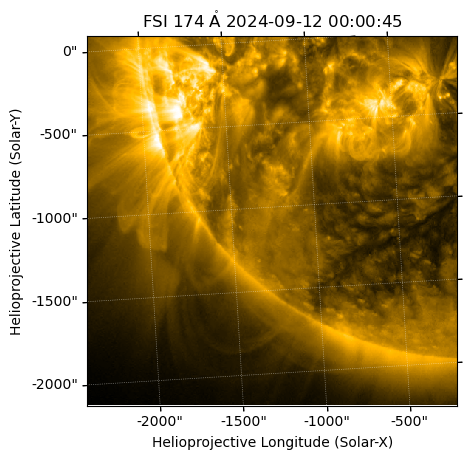

In [10]:
# take a look at the map again 
smap_crop.plot()

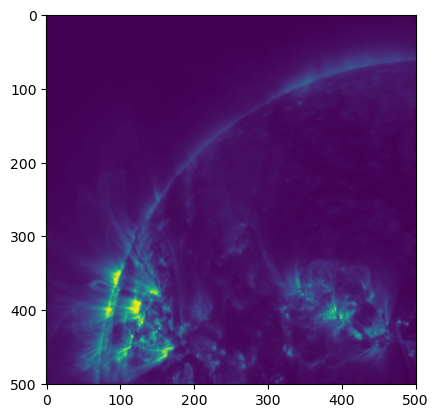

In [15]:
# lets first make a plot by ourserlves using matplotlib, in pixel coordinates
# similarily, there are two ways, one using plt.imshow, the other defining a figure and axis first
# then use ax.imshow(). In the meeting, we used the first one because it is simpler in
# the terminal, however the second way is more flexible to make a multi-panel plot.
# Just for consistency, we will use the first way in this notebook.

# the first way 
plt.imshow(smap_crop.data)
plt.show()

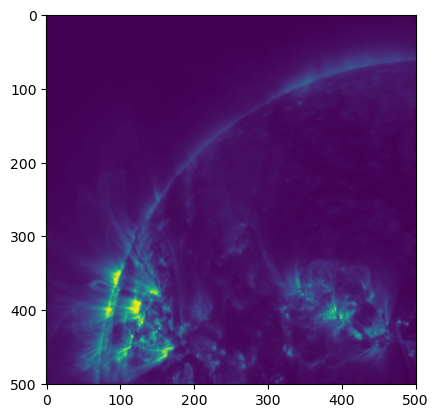

In [13]:
# the second way
fig, ax = plt.subplots()
ax.imshow(smap_crop.data)
plt.show()

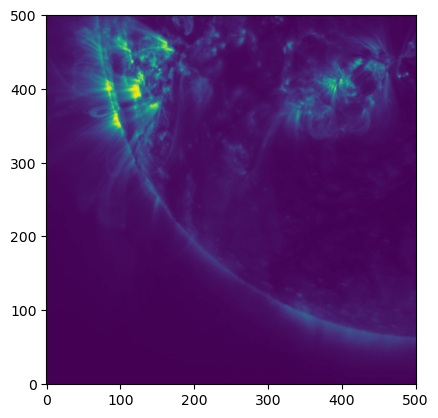

In [17]:
# we notice the origin (0,0) is at the top-left corner, and y increases downward. This is because
# the matplotlib imshow follows the computer graphics convention. Besides, the smap.data is in (ny,nx) shape.
# In contrast to the IDL convention, where the origin is at the bottom-left corner and y increases upward.

# to fix this, we do 
plt.imshow(smap_crop.data, origin='lower')
plt.show()

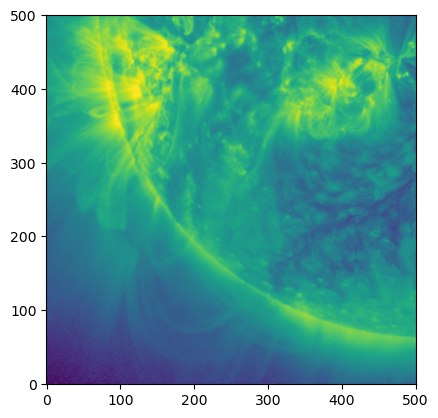

In [18]:
# now we notice the normalization is not good, because the image has a large dynamic range.
# A quick fix is to take the logarithm of the data

plt.imshow(np.log10(smap_crop.data), origin='lower')
plt.show()

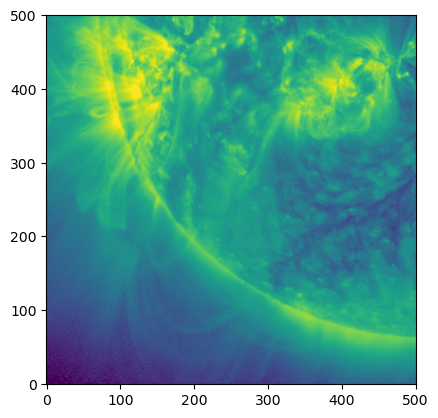

In [19]:
# Another way to do this is to pass a normlization object to imshow
# so that it knows how to map the data values to colors

norm = ImageNormalize(
    vmin = np.nanpercentile(smap_crop.data, 0.1), # set the minimum to the 0.1th percentile
    vmax = np.nanpercentile(smap_crop.data, 99.9), # set the maximum to the 99.9th percentile
    stretch = LogStretch() # use logarithmic stretch
)

plt.imshow(smap_crop.data, origin='lower', norm=norm)
plt.show()

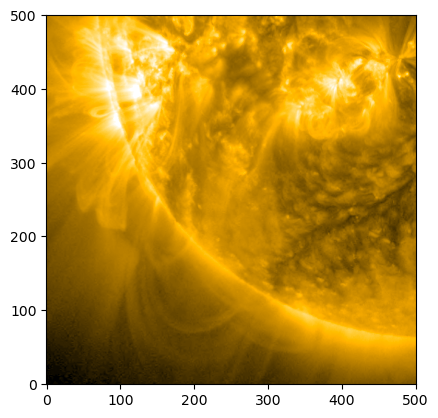

In [22]:
# finally we swtich to the fsi colormap 

plt.imshow(smap_crop.data, origin='lower', norm=norm, cmap='sdoaia171') # or cmap='solar orbiterfsi174' they are the same,
# a full list of solar colormaps can be found below
plt.show()

In [24]:
import sunpy.visualization.colormaps as cm
for key in cm.cmlist.keys():
    print(key)

goes-rsuvi94
goes-rsuvi131
goes-rsuvi171
goes-rsuvi195
goes-rsuvi284
goes-rsuvi304
sdoaia94
sdoaia131
sdoaia171
sdoaia193
sdoaia211
sdoaia304
sdoaia335
sdoaia1600
sdoaia1700
sdoaia4500
sohoeit171
sohoeit195
sohoeit284
sohoeit304
soholasco2
soholasco3
sswidlsoholasco2
sswidlsoholasco3
stereocor1
stereocor2
stereohi1
stereohi2
yohkohsxtal
yohkohsxtwh
hinodexrt
hinodesotintensity
trace171
trace195
trace284
trace1216
trace1550
trace1600
trace1700
traceWL
hmimag
irissji1330
irissji1400
irissji1600
irissji2796
irissji2832
irissji5000
irissjiFUV
irissjiNUV
irissjiSJI_NUV
kcor
rhessi
std_gamma_2
euvi171
euvi195
euvi284
euvi304
solar orbiterfsi174
solar orbiterfsi304
solar orbiterhri_euv174
solar orbiterhri_lya1216
